<div align="center" style="width: 100%; background-color: #F7F7F7; margin-bottom: 3em;">
    <h1 style="font-family: courier; color: #AF4545; font-size: 4em; padding-top: .5em;"><b>Statistical fundamentals and terminology for model building and validation</b></h1>
    <img src="../img/statistics-head.png">    
</div>

Este estudo é baseado no livro `Statistics for Machine Learning`, e o código abaixo possui trechos integrais do livro. Dito isso existem algumas adaptações, sugestões e complementos que jugo necessários.

---

Par iniciar vou importar os pacotes necessários na primeira parte do estudo.

In [25]:
import numpy as np
from scipy import stats

Esta é uma introdução básica, a estatística é um tema para uma vida quanto mais um notebook. Com isso em mente, vou me ater aos principais pontos, os necessários para um bom conhecimento do universo do `Machine Learning`.

> A análise preditiva se baseia na suposição de que a história tende a se repetir.

Neste caso, para fazermos predições, nosso objetivo será ajustar um **modelo matemático** aos dados históricos validando suas principais medidas, de tal maneira que este modelo possa ser utilizado a fim de prever eventos futuros baseados nas mesmas **variáveis explicativas** que estudamos no passado.

Modelos estatísticos são uma classe de modelos matemáticos que geralmente são especificados por equações matemáticas que relacionam uma ou mais variáveis a fim de se aproximar a realidade. Pressupostos incorporados por modelos estatísticos descrevem um conjunto de distribuições de probabilidade, que o diferencia dos modelos não estatísticos, matemáticos ou de aprendizado de máquina.

Os modelos estatísticos sempre começam com algumas suposições subjacentes para as quais todas as variáveis devem se manter; então, o desempenho fornecido pelo modelo é estatisticamente significativo. Portanto, conhecer os vários bits envolvidos em todos os blocos de construção fornece uma base sólida para ser um bom cientista de dados.

* População: é a totalidade, a lista completa de observações ou todos os pontos de dados sobre o assunto em estudo.
* Amostra: uma amostra é um subconjunto de uma população, geralmente uma pequena parte da população que está sendo analisada.

Geralmente, é caro realizar uma análise em uma população inteira; portanto, a maioria dos métodos estatísticos trata de tirar conclusões sobre uma população analisando uma amostra.

* **Parâmetro versus estatística**: qualquer medida calculada na população é um parâmetro, enquanto que em uma amostra é chamada de estatística.
* **Média**: Esta é uma média aritmética simples, calculada pela soma agregada dos valores dividida por uma contagem desses valores. A média é sensível aos valores discrepantes nos dados. Um valor externo é o valor de um conjunto ou coluna que é altamente desviado de muitos outros valores nos mesmos dados; geralmente tem valores muito altos ou baixos.
* **Mediana**: é o ponto médio dos dados e é calculado organizando-os em ordem crescente ou decrescente. Se houver N observações.
* **Moda**: é o ponto mais repetitivo nos dados:

![0](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/d7ca0b32-24a6-43fd-8281-3f995895ff1b.png)

O código abaixo usa o pacote stats e numpy para calular a média (median), mediana (median) e moda (mode).

A matriz inicial foi criada utilizando o numpy, isso dado que os modelos estatísticos utilizados neste estudo serão criados utilizando o pacote scikit-learn, que é baseado no numpy.

In [26]:
data = np.array([4,5,1,2,7,2,6,9,3])

# Calculate Mean
dt_mean = np.mean(data)
print ("Mean :",round(dt_mean,2))
              
# Calculate Median                 
dt_median = np.median(data)
print ("Median :",dt_median)

# Calculate Mode                     
dt_mode =  stats.mode(data)
print ("Mode :",dt_mode[0][0])

Mean : 4.33
Median : 4.0
Mode : 2


## Distribuições de probabilidade

As principais distribuições de probabilidade estão implementadas na biblioteca `scipy.stats`. Todas as distribuições implementadas nesta biblioteca tem um conjunto rico de métodos os principais são:

  - pdf: função densidade probabilidade ou função de probabilidade.
  - cdf: função de distribuição acumulada.
  - sf: função de sobreviência (complementar da cdf).
  - ppf: função quantil (inversa da cdf).
  - isf: inversa da função de sobreviência (complementar do inverso da cdf).
  - stats: esperança, variância, assimetria (skew) e curtose.
  - moment: Momentos não centrais.
  - rvs: amostras aleatórias.

Interessante notar que funções como a pdf e cdf são definidas na reta real, mesmo que a distribuição não corresponda a este suporte. Neste caso as funções vão retornar zero no caso da pdf e 0 ou 1 no caso da cdf. Por exemplo, o suporta da distribuição beta é o intervalo aberto (0,1). Assim, se a pdf fora deste intervalo será 0 e a cdf abaixo de 0 será 0 e acima de 1 será 1. 

Outro aspecto interessante da forma como a biblioteca `scipy.stats` implementa as distribuições é que você pode usá-las de duas formas: a primeira é a chamada forma congelada onde você inicializa a distribuição com os parâmetros de interesse e depois usa. A segunda você aplica a função diretamente passando como argumentos o ponto e os parâmetros para a avaliação da função. Vamos ver um exemplo,

In [27]:
import scipy.stats as sp

print(sp.norm.pdf(5, 3, 4)) # Avalia a distribuição Normal com mu = 3 e sigma2 = 4 no ponto 5.

mydist = sp.norm(3, 4) # Modo frozen 
print(mydist.pdf(5))

0.08801633169107488
0.08801633169107488


A biblioteca `scipy.stats` é muito rica em distribuições e a documentação é muito detalhada recomendo que veja o site da biblioteca [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html). Um outro aspecto útil é que todas as distribuições contínuas estão implementadas como um modelo de locação e escala. Esta é uma abordagem um pouco não usual, mas uma grande vantagem é que sabemos a parametrização de todas as distribuições contínuas previamente. A lista de distribuições é muito extensa e inclui distribuições multivariadas como a Gaussiana, Dirichlet e Wishart. 

Como um exemplo para explorar como usamos as distribuições da `scipy.stats` vou usar em um primeiro momento a distribuição Gaussiana porque suas propriedades são bem conhecidas. Em um segundo momento fazer usar uma distribuição não usual como a *generalized extreme value distribution*. Vamos calcular algumas quantidades da distribuição Gaussiana.

In [28]:
my_norm = sp.norm(loc = 10, scale = 5)
# Aspectos da distribuição
my_norm.expect() # Esperança
my_norm.median() # Mediana
my_norm.moment(n = 1) # Primeiro momento (esperança)
my_norm.moment(n = 2) # Segundo momento
my_norm.stats() # Média e variancia
my_norm.std() # Erro padrão
my_norm.var() # Variance
my_norm.entropy() # Entropia

mean, var, skew, kurt = my_norm.stats(moments = 'mvsk')
print(mean, var, skew, kurt)

10.0 25.0 0.0 0.0


Ainda não falamos sobre gráficos em python, mas eu vou inicializar uma figura, mais detalhes serão vistos nos próximos encontros. Gráfico da função densidade probabilidade.

Vamos simular uma amostra aleatório da distribuição Gaussiana e fazer um histograma e sobrepor a densidade que acabamos de calcular.

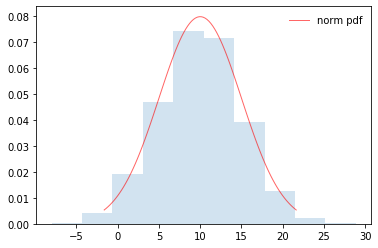

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1)

x = np.linspace(my_norm.ppf(0.01), my_norm.ppf(0.99), 100)
ax.plot(x, my_norm.pdf(x), 'r-', lw=1, alpha=0.6, label='norm pdf')

amostra = my_norm.rvs(10000)
ax.hist(amostra, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

Outro método que também está disponível para todas as distribuições implementadas na biblioteca `scipy.stats` é o método `fit`. Como o nome sugere este método ajusta a distribuição para um vetor de observações.

In [30]:
amostra = my_norm.rvs(100)
print(sp.norm.fit(amostra)) # Ajustando a própria Normal
print(sp.t.fit(amostra)) # Ajustando a distribuição t
print(sp.cauchy.fit(amostra)) # Cauchy ou qq outra que seja adequada.

(9.677558586317708, 4.577823988903881)
(3518998.448550458, 9.677857227098563, 4.577722231657916)
(9.769109923281029, 2.9145346025200185)


Em geral as distribuições de probabilidade implementadas na biblioteca `scipy.stats` são vetorizadas. Assim, se o argumento for um objeto `ndarray` a função será aplicada em cada uma das entradas do `ndarray` e a saída também será um `ndarray`.

In [31]:
a = np.array([-3,-2,-1,0,1,2,3])
sp.norm.pdf(a, loc = 0, scale = 1)

array([0.00443185, 0.05399097, 0.24197072, 0.39894228, 0.24197072,
       0.05399097, 0.00443185])

Assim termino esta rápida introdução de como e onde as funções de probabilidades estão implementadas em python. Na sequência vou introduzir as principais idéias de otimização de funções em python.

## Otimização

Otimização de funções tem um papel central em inferência estatística. Uma vez que o estimador de maxima verossimilhança é o supremo da função de log-verossimilhança encontrar este ponto é crucial para o processo de inferência. O python através do modulo `scipy.optimization` fornece vários algoritmos para numericamente encontrar o mínimo/máximo de uma função pré-especificada. Este modulo também fornece algoritmos para solução de sistemas de equações não-lineares e minimização via métodos dos mínimos quadrados. Vamos ver alguns exemplos de como usar esta poderosa biblioteca. Como exemplo vou implementar a log-verossimilhança de um modelo de regressão linear simples.

In [32]:
x = np.array(range(0,10))
par = np.array([2,0.8,0.5])
my_norm = sp.norm(loc = 0, scale = par[2])
e = my_norm.rvs(len(x))
mu = par[0] + par[1]*x
y = mu + e
print(y)

[2.22747985 2.98913084 3.96304652 3.88286941 5.25055912 5.22025798
 7.005927   7.79190839 7.51322383 9.67606474]


In [33]:
from scipy.optimize import minimize
from math import exp, log

def linreg(par, y, x):
    mu = par[0] + par[1]*x
    output = -sp.norm.logpdf(y, loc = mu, scale = exp(par[2])).sum()
    #print(output)
    return(output)

# Avaliando a log-lik no ponto
linreg(par = np.array([2.1788,0.7743, log(0.3817)]), y = y, x = x) 

# Valores iniciais
par = np.array([2,0.8, log(2)])

# Nelder-Mead
res1 = minimize(linreg, par, method='nelder-mead', args = (y,x))
print(res1.x)
print(res1.fun)

# Gradiente Conjugado
res2 = minimize(linreg, par, method = 'CG', args = (y,x))
print(res2.x)
print(res2.fun)

# BFGS
res3 = minimize(linreg, par, method = 'BFGS',  args = (y,x))
print(res3.x)
print(res3.fun)

# Powell
res4 = minimize(linreg, par, method = 'Powell', args = (y,x))
print(res4.x)
print(res4.fun)

# Escore
print(res3.jac)

# Temos o inverso do hessiano
print(res3.hess_inv)

[ 2.08325619  0.77083923 -0.78114441]
6.377595779854763
[ 2.08325397  0.77084288 -0.78117857]
6.377595760422819
[ 2.08325332  0.77084298 -0.78117893]
6.377595760417703
[ 2.08321123  0.77084964 -0.78129439]
6.377595905871967
[-5.96046448e-07 -2.38418579e-06  4.76837158e-07]
[[ 7.22133604e-02 -1.14451524e-02 -3.26751095e-04]
 [-1.14451524e-02  2.54060362e-03 -3.12294568e-05]
 [-3.26751095e-04 -3.12294568e-05  4.70887117e-02]]


* Medida de dispersão ou variabilidade: Dispersão é a variação nos dados e mede as inconsistências no valor das variáveis nos dados. A dispersão, na verdade, fornece uma idéia sobre o spread, em vez de valores centrais.
* Faixa: Essa é a diferença entre o máximo e o mínimo do valor.
* Variância: é a média dos desvios ao quadrado da média (xi = pontos de dados, µ = média dos dados, N = número de pontos de dados). A dimensão da variação é o quadrado dos valores reais. A razão para usar o denominador N-1 para uma amostra em vez de N na população é devido ao grau de liberdade. 1 grau de liberdade perdido em uma amostra no momento do cálculo da variação é devido à extração da substituição da amostra:

![1](https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/04829f06-fff4-4694-9b3e-62508ac4a609.jpg)

In [34]:
# Deviance calculations

from statistics import variance,stdev

game_points = np.array([35,56,43,59,63,79,35,41,64,43,93,60,77,24,82])

# Calculate Variance
dt_var = variance(game_points)
print ("Sample variance:", round(dt_var,2))

# Calculate Standard Deviation
dt_std = stdev(game_points)
print ("Sample std.dev:",round(dt_std,2))
               
# Calculate Range
dt_rng = np.max(game_points,axis=0) - np.min(game_points,axis=0)
print ("Range:",dt_rng)

Sample variance: 400
Sample std.dev: 20.0
Range: 69


In [35]:
#Calculate percentiles
print ("Quantiles:")

for val in [20,80,100]:
    dt_qntls = np.percentile(game_points,val) 
    print (str(val)+"%" ,dt_qntls)
                                
# Calculate IQR                           
q75, q25 = np.percentile(game_points, [75 ,25])
print ("Inter quartile range:",q75-q25 )

Quantiles:
20% 39.800000000000004
80% 77.4
100% 93.0
Inter quartile range: 28.5


In [36]:
# Hypothesis testing        

xbar = 990; mu0 = 1000; s = 12.5; n = 30

# Test Statistic
t_smple  = (xbar-mu0)/(s/np.sqrt(float(n)))
print ("Test Statistic:",round(t_smple,2))

# Critical value from t-table
alpha = 0.05
t_alpha = stats.t.ppf(alpha,n-1)
print ("Critical value from t-table:",round(t_alpha,3))

#Lower tail p-value from t-table                        
p_val = stats.t.sf(np.abs(t_smple), n-1)
print ("Lower tail p-value from t-table", p_val)

Test Statistic: -4.38
Critical value from t-table: -1.699
Lower tail p-value from t-table 7.035025729010886e-05


In [37]:
# Normal Distribution

xbar = 67; mu0 = 52; s = 16.3

# Calculating z-score
z = (67-52)/16.3

# Calculating probability under the curve    
p_val = 1- stats.norm.cdf(z)

print ("Prob. to score more than 67 is ",round(p_val*100,2),"%")

Prob. to score more than 67 is  17.87 %


In [38]:
# Chi-square independence test
import pandas as pd

survey = pd.read_csv("survey.csv")

# Tabulating 2 variables with row & column variables respectively
survey_tab = pd.crosstab(survey.Smoke, survey.Exer, margins = True)

# Creating observed table for analysis
observed = survey_tab.iloc[0:4,0:3] 

contg = stats.chi2_contingency(observed= observed)
p_value = round(contg[1],3)

print ("P-value is: ",p_value)

FileNotFoundError: [Errno 2] File b'survey.csv' does not exist: b'survey.csv'

In [39]:
#ANOVA

fetilizers = pd.read_csv("fetilizers.csv")

one_way_anova = stats.f_oneway(fetilizers["fertilizer1"], fetilizers["fertilizer2"], fetilizers["fertilizer3"])

print ("Statistic :", round(one_way_anova[0],2),", p-value :",round(one_way_anova[1],3))

FileNotFoundError: [Errno 2] File b'fetilizers.csv' does not exist: b'fetilizers.csv'

In [14]:
# Train & Test split

from sklearn.model_selection import train_test_split

original_data = pd.read_csv("mtcars.csv")

train_data,test_data = train_test_split(original_data,train_size = 0.7,random_state=42)

print(len(original_data))
print(len(train_data))
print(len(test_data))

32
22
10


In [15]:
# Linear Regressio vs. Gradient Descent

train_data = pd.read_csv("mtcars.csv")
                        
X = np.array(train_data["hp"])  ; y = np.array(train_data["mpg"])
X = X.reshape(32,1); y = y.reshape(32,1)

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
 
model.fit(X,y)
print ("Linear Regression Results")
print ("Intercept",model.intercept_[0] ,"Coefficient",model.coef_[0])
                   

def gradient_descent(x, y,learn_rate, conv_threshold,batch_size,max_iter):
    converged = False
    iter = 0
    m = batch_size 
 
    t0 = np.random.random(x.shape[1])
    t1 = np.random.random(x.shape[1])

    MSE = (sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])/ m)

    while not converged:
        grad0 = 1.0/m * sum([(t0 + t1*x[i] - y[i]) for i in range(m)])
        grad1 = 1.0/m * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])

        temp0 = t0 - learn_rate * grad0
        temp1 = t1 - learn_rate * grad1
    
        t0 = temp0
        t1 = temp1

        MSE_New = (sum( [ (t0 + t1*x[i] - y[i])**2 for i in range(m)] ) / m)

        if abs(MSE - MSE_New ) <= conv_threshold:
            print ('Converged, iterations: ', iter)
            converged = True
    
        MSE = MSE_New
        iter += 1
    
        if iter == max_iter:
            print ('Max interactions reached')
            converged = True

    return t0,t1

if __name__ == '__main__':
    Inter, Coeff = gradient_descent(x = X,y = y,learn_rate=0.00003 ,conv_threshold=1e-8, batch_size=32,max_iter=1500000)
    print ("Gradient Descent Results")
    print (('Intercept = %s Coefficient = %s') %(Inter, Coeff)) 

Linear Regression Results
Intercept 30.098860539622496 Coefficient [-0.06822828]
Converged, iterations:  1140566
Gradient Descent Results
Intercept = [30.02495106] Coefficient = [-0.06781243]


In [16]:
# Train Validation Test split

original_data = pd.read_csv("mtcars.csv")

def data_split(dat,trf = 0.5,vlf=0.25,tsf = 0.25):
    nrows = dat.shape[0]
    trnr = int(nrows*trf)
    vlnr = int(nrows*vlf)
    
    tr_data,rmng = train_test_split(dat,train_size = trnr,random_state=42)
    vl_data, ts_data = train_test_split(rmng,train_size = vlnr,random_state=45)
    
    return (tr_data,vl_data,ts_data)

train_data, validation_data, test_data = data_split(original_data,trf=0.5,vlf=0.25,tsf=0.25)

In [17]:
# Grid search on Decision Trees
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.pipeline import Pipeline

input_data = pd.read_csv("ad.csv",header=None)

X_columns = set(input_data.columns.values)
y = input_data[len(input_data.columns.values)-1]
X_columns.remove(len(input_data.columns.values)-1)
X = input_data[list(X_columns)]

X_train, X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state=33)

pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(criterion='entropy'))
])
parameters = {
    'clf__max_depth': (50,100,150),
    'clf__min_samples_split': (2, 3),
    'clf__min_samples_leaf': (1, 2, 3)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

print ('\n Best score: \n', grid_search.best_score_)
print ('\n Best parameters set: \n')

best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

print ("\n Confusion Matrix on Test data \n",confusion_matrix(y_test,y_pred))
print ("\n Test Accuracy \n",accuracy_score(y_test,y_pred))
print ("\nPrecision Recall f1 table \n",classification_report(y_test, y_pred))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s



 Best score: 
 0.970806100217865

 Best parameters set: 

	clf__max_depth: 100
	clf__min_samples_leaf: 2
	clf__min_samples_split: 2

 Confusion Matrix on Test data 
 [[814  19]
 [ 23 128]]

 Test Accuracy 
 0.9573170731707317

Precision Recall f1 table 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       833
           1       0.87      0.85      0.86       151

    accuracy                           0.96       984
   macro avg       0.92      0.91      0.92       984
weighted avg       0.96      0.96      0.96       984



[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    6.3s finished
